## Data loading and initial scan 

1. **Import** all the libraries, functions and files necessary for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from functions import *
%reload_ext autoreload
%autoreload 2

In [3]:
df_demo = pd.read_csv('data/df_final_demo.txt')
df_web_data_pt1 = pd.read_csv('data/df_final_web_data_pt_1.txt')
df_web_data_pt2 = pd.read_csv('data/df_final_web_data_pt_2.txt')
df_experiment_clients = pd.read_csv('data/df_final_experiment_clients.txt')

2. **Join the web data** 

Explore the datasets that contain the information of the detailed trace of client interactions online, which is divided into two parts.
To evaluate if it is possible to join them, with what method and if it is necessary to do some type of cleaning first.

In [4]:
explore(df_web_data_pt1)

(343141, 5)
   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
5    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
6    9988021  580560515_7732621733  781255054_21935453173_531117       step_1   
7    9988021  580560515_7732621733  781255054_21935453173_531117        start   
8    8320017  39393514_33118319366  960651974_70596002104_312201      confirm   
9    8320017  39393514_33118319366  960651974_70596002104_312201       step_3   

             date_time  
0  2017-04-17 15:27:07  
1  2017-04-17 15:26:51  
2  2017-04-17 15:19:2

In [5]:
explore(df_web_data_pt2)

(412264, 5)
   client_id             visitor_id                      visit_id  \
0     763412  601952081_10457207388  397475557_40440946728_419634   
1    6019349  442094451_91531546617  154620534_35331068705_522317   
2    6019349  442094451_91531546617  154620534_35331068705_522317   
3    6019349  442094451_91531546617  154620534_35331068705_522317   
4    6019349  442094451_91531546617  154620534_35331068705_522317   
5    6019349  442094451_91531546617  154620534_35331068705_522317   
6    4726500  934350987_45569789638  467318052_88159801968_565608   
7    4726500  934350987_45569789638  467318052_88159801968_565608   
8    4726500  934350987_45569789638  467318052_88159801968_565608   
9    4726500  934350987_45569789638  467318052_88159801968_565608   

  process_step            date_time  
0      confirm  2017-06-06 08:56:00  
1      confirm  2017-06-01 11:59:27  
2       step_3  2017-06-01 11:58:48  
3       step_2  2017-06-01 11:58:08  
4       step_1  2017-06-01 11:57:58  


We use the concatenate method because we want to join the DataFrames by stacking rows. To facilitate the general analysis of the final information on the website.

In [6]:
df_web_data = pd.concat([df_web_data_pt1, df_web_data_pt2], ignore_index=True)

3. **Explore the DataFrames**


We apply a function that prints the head, the null and datatype information of the columns.

In [7]:
explore(df_demo)

(70609, 9)
   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   
5    3727881             5.0              71.0      30.5     U        2.0   
6     272934             5.0              66.0      58.5     U        2.0   
7     388801            30.0             361.0      57.5     M        5.0   
8     285619            30.0             369.0      67.5     M        2.0   
9    8198645            15.0             189.0      54.5     F        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30           6.0            9.0  
2   52467

In [8]:
explore(df_web_data)

(755405, 5)
   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
5    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
6    9988021  580560515_7732621733  781255054_21935453173_531117       step_1   
7    9988021  580560515_7732621733  781255054_21935453173_531117        start   
8    8320017  39393514_33118319366  960651974_70596002104_312201      confirm   
9    8320017  39393514_33118319366  960651974_70596002104_312201       step_3   

             date_time  
0  2017-04-17 15:27:07  
1  2017-04-17 15:26:51  
2  2017-04-17 15:19:2

In [9]:
explore(df_experiment_clients)

(70609, 2)
   client_id Variation
0    9988021      Test
1    8320017      Test
2    4033851   Control
3    1982004      Test
4    9294070   Control
5    9466803      Test
6    3170143      Test
7    6651403   Control
8    5887227      Test
9    2105948   Control
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None


## Cleaning data

### 1. Cleaning df_demo

Call the function that will remove rows with too many null values and duplicate rows, to remove what is not essential.

In [10]:
df_demo = remove_nulls_and_duplicates(df_demo, threshold=0.8)

c:\Users\almuo\Desktop\IRONHACK\PROJECT 2 AB TESTING\Vanguard-AB-Test-Analysis\functions.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(inplace=True)


Change the names of the columns of this dataframe, to make it simpler and more understandable.

In [11]:
df_demo = rename_columns_1(df_demo)

We fill in the null values by the mean in the age column. Since there is only one null value and the mean is a representative value of the data set, it will not change the results.

In [12]:
df_demo = mean_fill_missing_values(df_demo, 'client_age')

Convert the gender column to a categorical data type to facilitate analysis.

In [13]:
df_demo = convert_to_categorical(df_demo, 'gender')

### 2. Cleaning df_web_data

Convert the date_time column to a datetime format to be able to work with dates and times more easily.

In [14]:
df_web_data = convert_to_datetime(df_web_data, 'date_time')

Convert the steps into numbers to be able to work with them more easily.

In [15]:
convert_steps_to_number(df_web_data, 'process_step')

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,0,2017-05-24 18:44:34


### 3. Cleaning df_experiment_clients

We changed the name of the column 'Variation' to 'experiment_group' to avoid the use of capital letters and make it more understandable.

In [16]:
df_experiment_clients.rename(columns={'Variation': 'experiment_group'}, inplace=True)

We remove the rows with null values in the Variation column, because their value is crucial (it distinguishes between “Test” and “Control”). Therefore, we cannot fill them in, nor use them for analysis without knowing which group they belong to.

Convert the gender column to a categorical data type to facilitate analysis.

In [17]:
df_experiment_clients = convert_to_categorical(df_experiment_clients, 'experiment_group')

## Condensing web data

### 1. Extract data from the original dataframe

We extract information from the df_web_data to **create a dataframe** in which each customer has a single row. The original dataframe has many records per client, for each interaction on the web site, totaling 755405 rows. We **condens the information** to reduce the amount of redundant data. 

The result is a more manageable dataframe, where **each row represents a unique customer with its key metrics**. This structure will facilitate efficient merge with other dataframes and subsequent analysis, which are essential for our A/B testing analysis.

- **Number of visits**: count how many unique visits (visit_id) each customer made in the online process. It can be related to the efficiency of the website.

In [18]:
# Count the number of visits per client
visits_count = df_web_data.groupby('client_id')['visit_id'].nunique().reset_index()
visits_count.columns = ['client_id', 'num_visits']

- **Number of steps**: count the total number of unique steps (process_step) that each customer completed in all visits. It shows us how far each customer progressed through the process and the efficiency of the user flow.

In [19]:
# Count the number of steps for each client
steps_count = df_web_data.groupby('client_id').size().reset_index(name='num_steps')

- **Completion_status**: is a Boolean indicator that marks whether the customer reached the final step (confirm) or not. It is essential to measure the success of the process and to calculate the flow completion rate.

In [20]:
# Calculate completion rate
df_web_data['completed'] = df_web_data['process_step'] == 4
completion_rate = df_web_data.groupby('client_id')['completed'].max().reset_index()
completion_rate.columns = ['client_id', 'completion_status']

- **Total time spent**: add up the total time each customer spent in the online process, first calculating the difference between the successive steps. It could indicate difficulties in navigation or overly complex processes.

In [21]:
#Order the dataframe to calculate the difference in time
df_web_data = df_web_data.sort_values(by=['visitor_id', 'date_time'])

# Calculate time spent creating a column in the original dataframe
df_web_data['time_spent'] = df_web_data.groupby('visit_id')['date_time'].diff().shift(-1)

In [22]:
# Calculate total time spent per client
total_time_per_client = df_web_data.groupby('client_id')['time_spent'].sum().reset_index()
total_time_per_client.columns = ['client_id', 'total_time_spent']
total_time_per_client.head(10)

,client_id,total_time_spent
0,169,0 days 00:03:33
1,336,0 days 00:15:48
2,546,0 days 00:02:13
3,555,0 days 00:02:38
4,647,0 days 00:06:17
5,722,0 days 00:09:59
6,786,0 days 00:05:12
7,805,0 days 00:03:38
8,832,0 days 00:02:14
9,934,0 days 00:02:22


- **Repeated step**: boolean indicator that signals if the client repeated any step in the process. May be a sign of confusion or usability problems in the flow.

Create a dataframe with all the necessary data from df_web_data and add the columns with the information we need to know if any steps have been repeated.   

In [23]:
# Group by client_id and visit_id to count repeated steps per visit
repeat_steps = df_web_data.groupby(['client_id', 'visit_id'])['process_step'].value_counts()

# Create a dataframe with the count of repeated steps and add a column on whether or not there are repeated steps (appears more than once).
repeat_steps = repeat_steps.reset_index(name='count')
repeat_steps['repeated_step'] = repeat_steps['count'] > 1

From the dataframe that we have created we reduce the information until we have only the necessary. Grouping first by client and visit to be left at the end with a dataframe with the client_id and if it has repeated steps in any of his visits.

In [24]:
# Group this information first by visit_id to see if you have repeated any steps in that visit.
repeat_steps_visit = repeat_steps.groupby(['client_id', 'visit_id'])['repeated_step'].any().reset_index()

# Finally group by client_id, to see if the clients have repeated steps in any of their visits.
repeat_steps_client = repeat_steps_visit.groupby('client_id')['repeated_step'].any().reset_index()


- **Error rate**: boolean indicator that signals if the client repeated any step in the process. May be a sign of confusion or usability problems in the flow.

We prepare the original dataframe in order to extract the necessary information. Sorting it by customer, visit and time; then creating a column with the inner step; and finally, determining if it has return by comparing the values of the two columns.

In [25]:
# Order the dataframe
df_web_data = df_web_data.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Create a column that captures the above step for each customer at each visit.
df_web_data['previous_step'] = df_web_data.groupby(['client_id', 'visit_id'])['process_step'].shift(1)

# Create a column that indicates whether the customer goes backwards in the flow (if the current step is smaller than the previous step).
df_web_data['went_back'] = df_web_data['process_step'] < df_web_data['previous_step']

We create a dataframe to reduce the information until we have only the necessary. Grouping first by client and visit and reach the final dataframe with client_id and if it has gone back on the process.

In [26]:
# Group by client_id and visit_id to see if there were stepbacks on each visit)
error_rate_visits = df_web_data.groupby(['client_id', 'visit_id'])['went_back'].any().reset_index()

# Group by client_id to see if the client had errors on at least one of his visits 
error_rate_client = error_rate_visits.groupby('client_id')['went_back'].any().reset_index()


### 2. Create the condensed dataframe

Join all the information we extracted from the original dataframe(df_web_data) in df_web.

In [27]:
df_web = visits_count.copy()

df_web = df_web.merge(steps_count, on='client_id', how='left')
df_web = df_web.merge(completion_rate, on='client_id', how='left')
df_web = df_web.merge(total_time_per_client, on='client_id', how='left')
df_web = df_web.merge(repeat_steps_client, on='client_id', how='left')
df_web = df_web.merge(error_rate_client, on='client_id', how='left')

### 3. Complete the dataframe

- **Steps per visit**: Calculated by dividing the total number of steps (num_steps) by the number of visits (num_visits), it tells us how many steps on average a customer completed in their visits.

In [28]:
#Complete the information with an average of steps per visit
df_web['steps_per_visit'] = (df_web['num_steps']/df_web['num_visits']).round(2)

- **Total time in seconds**: the seconds version of the total time, that allows for more detailed analysis by switching from datatime to integer format.

In [29]:
#Complete the information with a column of the time expressed in seconds
df_web['total_time_seconds'] = df_web['total_time_spent'].dt.total_seconds().astype(int)

**Order the columns**: so that the column layout in the dataframe makes more sense in the reading order of the data.

In [30]:
columnas_ordenadas = ['client_id', 'num_visits', 'num_steps', 'steps_per_visit', 'repeated_step', 'went_back', 'total_time_spent', 'total_time_seconds', 'completion_status']
df_web = df_web[columnas_ordenadas]

df_web.head(10)

,client_id,num_visits,num_steps,steps_per_visit,repeated_step,went_back,total_time_spent,total_time_seconds,completion_status
0,169,1,5,5.0,False,False,0 days 00:03:33,213,True
1,336,1,2,2.0,True,False,0 days 00:15:48,948,False
2,546,1,5,5.0,False,False,0 days 00:02:13,133,True
3,555,1,5,5.0,False,False,0 days 00:02:38,158,True
4,647,1,5,5.0,False,False,0 days 00:06:17,377,True
5,722,1,9,9.0,True,True,0 days 00:09:59,599,True
6,786,1,6,6.0,True,False,0 days 00:05:12,312,True
7,805,3,9,3.0,True,True,0 days 00:03:38,218,False
8,832,1,7,7.0,True,True,0 days 00:02:14,134,True
9,934,1,4,4.0,True,False,0 days 00:02:22,142,False


## Join dataframes

In [31]:
df_complete = df_demo.merge(df_experiment_clients, on='client_id', how='left')
df_complete = df_complete.merge(df_web, on='client_id', how='left')

We fill in null values to avoid errors, as we do not know which group of experiment they are from, for now we leave them as 'Unknown'.

In [32]:
# Add 'Unknown' as a category for experiment group
df_complete['experiment_group'] = df_complete['experiment_group'].cat.add_categories('Unknown')

# Fill the missing values with 'Unknown'
df_complete['experiment_group'].fillna('Unknown', inplace=True)

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\2065902673.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_complete['experiment_group'].fillna('Unknown', inplace=True)


In [33]:
df_complete

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logons_last_6_months,experiment_group,num_visits,num_steps,steps_per_visit,repeated_step,went_back,total_time_spent,total_time_seconds,completion_status
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,2,11,5.50,True,False,0 days 00:33:54,2034,True
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,1,6,6.00,True,False,0 days 00:04:55,295,True
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,2,5,2.50,False,False,0 days 00:01:57,117,False
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,1,1,1.00,False,False,0 days 00:00:00,0,False
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,1,1,1.00,False,False,0 days 00:00:00,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70590,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,Unknown,3,11,3.67,True,False,0 days 00:42:04,2524,True
70591,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,Unknown,1,8,8.00,True,True,0 days 00:08:49,529,True
70592,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,Unknown,1,5,5.00,False,False,0 days 00:19:15,1155,True
70593,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,Unknown,5,9,1.80,True,True,0 days 00:01:29,89,False


## EDA univariate to manage outliers

### Unkown experiment group

In [34]:
# Filter out 'Unknown' from the dataframe
df_filtered = df_complete[df_complete['experiment_group'] != 'Unknown']

# Remove the specific category 'Unknown'
df_filtered['experiment_group'] = df_filtered['experiment_group'].cat.remove_categories('Unknown')

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\3308181009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['experiment_group'] = df_filtered['experiment_group'].cat.remove_categories('Unknown')


### Outliers client tenure months

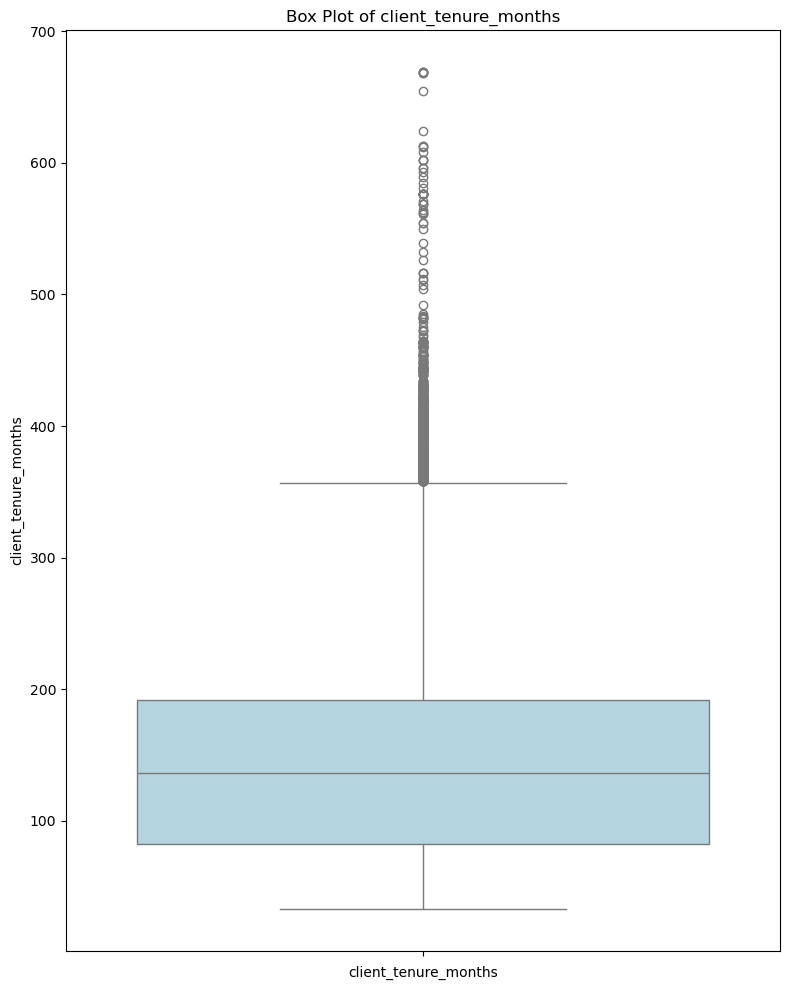

In [35]:
plot_boxplot(df_filtered, 'client_tenure_months')

In [36]:
df_filtered = df_filtered[df_filtered['client_tenure_months'] <= 700]

### Outliers steps per visit

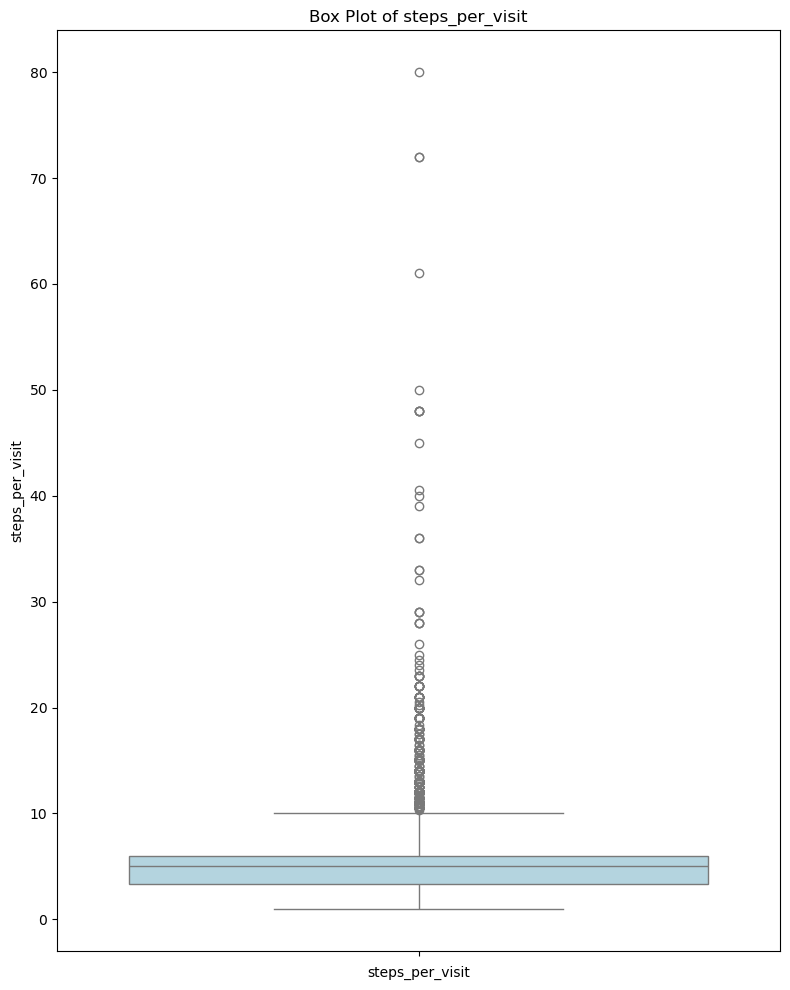

In [37]:
plot_boxplot(df_filtered, 'steps_per_visit')

In [38]:
df_filtered = df_filtered[df_filtered['steps_per_visit'] <= 30]

### Outliers total time seconds

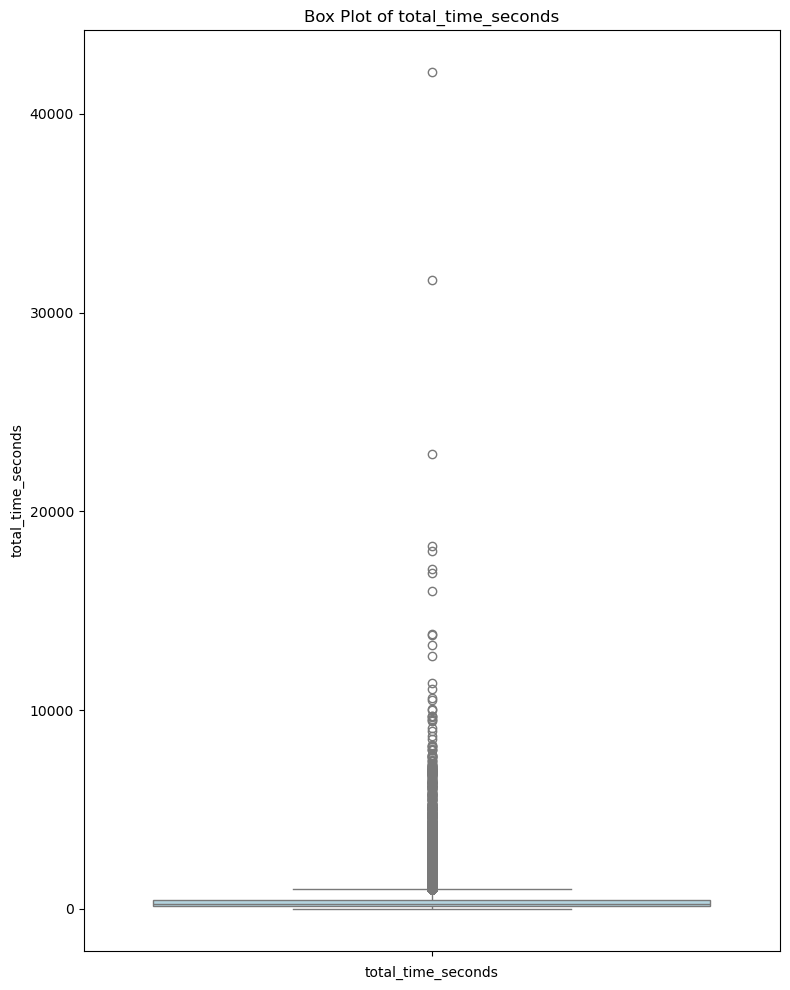

In [39]:
plot_boxplot(df_filtered, 'total_time_seconds')

In [40]:
df_filtered = df_filtered[df_filtered['total_time_seconds'] <= 8000]

### Outliers balance

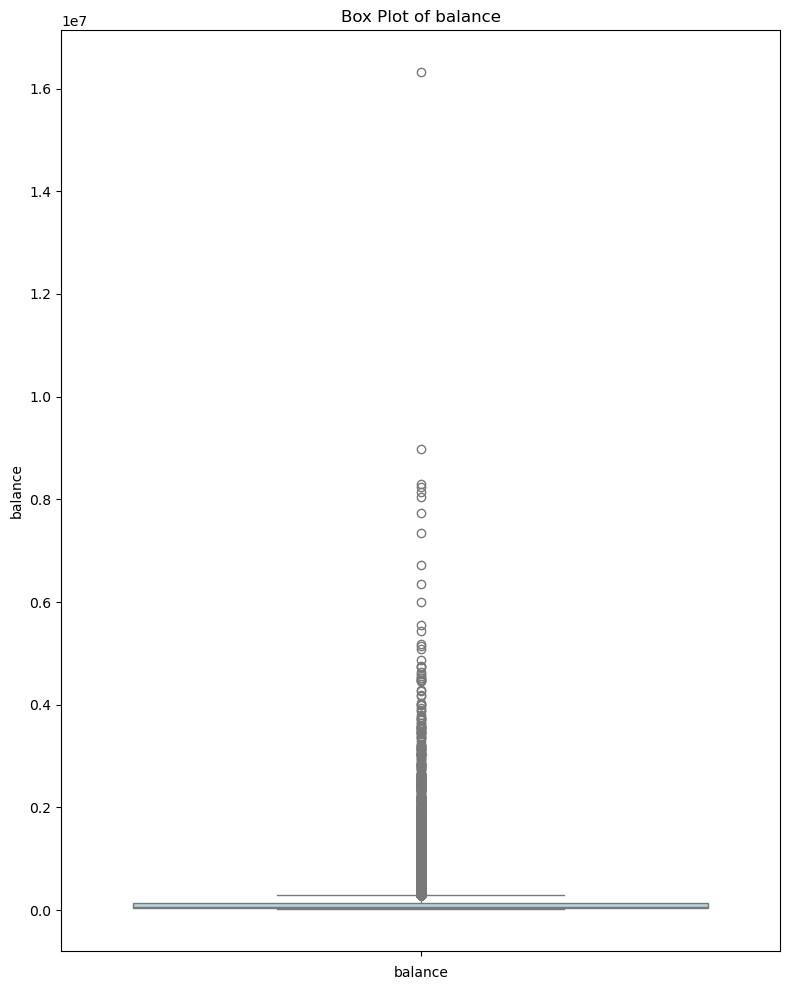

In [41]:
plot_boxplot(df_filtered, 'balance')

In [42]:
df_filtered = df_filtered[df_filtered['balance'] <= 1000000]

### Outliers num visits

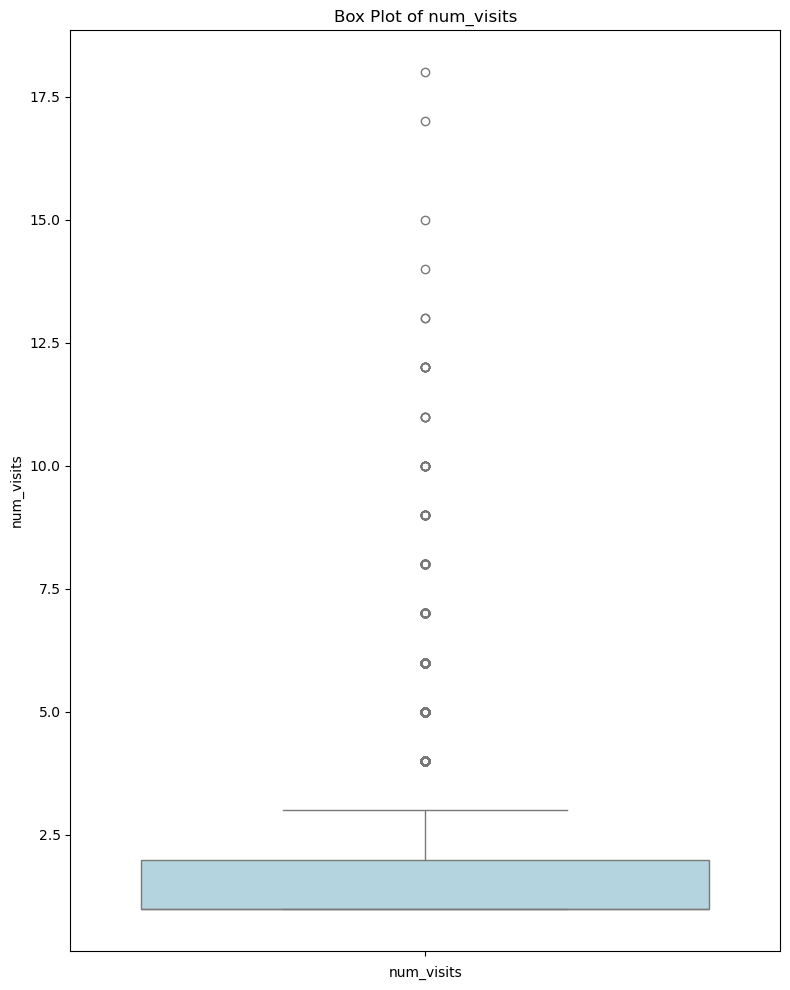

In [43]:
plot_boxplot(df_filtered, 'num_visits')

In [44]:
df_filtered = df_filtered[df_filtered['num_visits'] <= 15]

### Ouliers num steps

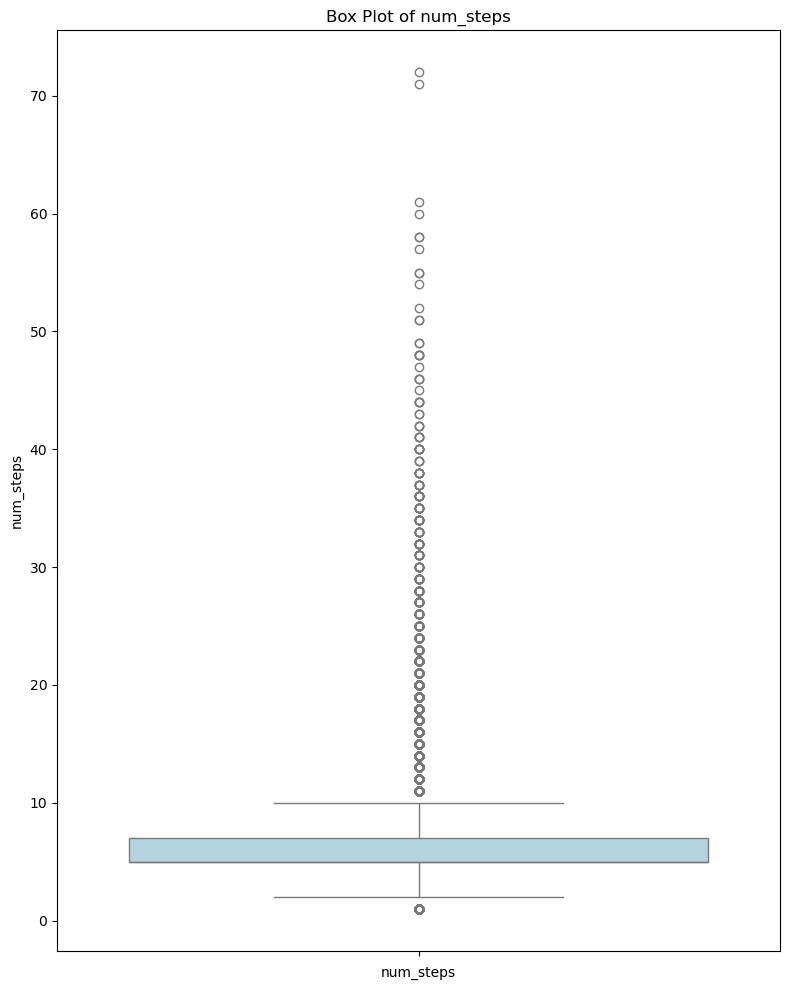

In [45]:
plot_boxplot(df_filtered, 'num_steps')

In [46]:
df_filtered = df_filtered[df_filtered['num_steps'] <= 60]

# EDA bivariate

**Continuous variables**
- client_tenure_years – Number of years a client has been with the company.
- client_tenure_months – Number of months a client has been with the company.
- client_age – Age of the client.
- num_accounts – Number of accounts the client holds.
- balance – The total balance the client has across all accounts.
- calls_last_6_months – Number of times the client has called the company in the last 6 months.
- logons_last_6_months – Number of times the client has logged into the platform in the last 6 months.
- num_visits – Number of visits made by the client during the experiment period.
- num_steps – Total number of steps taken by the client during the process.
- steps_per_visit – Average number of steps per visit.
- total_time_seconds – Total time spent by the client in seconds during the process.

**Categorical variables**
- client_id – Unique identifier for the client (can be treated as categorical or as an identifier).
- gender – Gender of the client (M, F, U for unknown).
- experiment_group – Group the client is assigned to for the experiment (Test or Control).
- repeated_step – Whether the client repeated any steps (True/False).
- went_back – Whether the client went back during the process (True/False).
- completion_status – Whether the client completed the process (True/False).

**Time variable**
- total_time_spent – The total time spent in the process in a timedelta format.


## Experiment group vs completion rate

The **slightly higher completion rate** of the test group (54.7%) compared to the control group (45.2%) is **statistically significant**, but the strength of this **relationship is weak** (as indicated by the low Cramér's V) 

New design may be enhancing completion, but the effect is small. We will need more information to assess whether the other variables make a noticeable difference.

In [47]:
#Create a crosstab only for 'Control' and 'Test'
crosstab_completion = pd.crosstab(df_filtered['experiment_group'], df_filtered['completion_status'])
((crosstab_completion/crosstab_completion.sum())*100).round(2)

completion_status,False,True
experiment_group,,
Control,49.42,45.21
Test,50.58,54.79


In [48]:
# Chi-square test for significance
chi_results(crosstab_completion)

Chi2: 77.3933167140597, p-value: 1.400884349804737e-18


In [49]:
# Computing the association between experiment group and completion rate
cramer_result(crosstab_completion)

0.03954159253744756

<Axes: xlabel='experiment_group'>

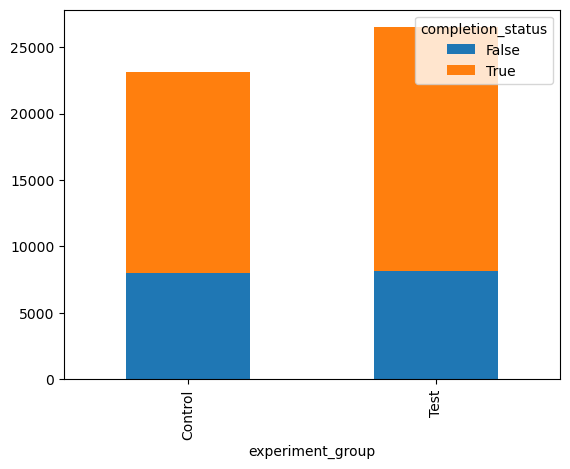

In [50]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_completion.plot(kind="bar", stacked=True)

## Experiment group vs went back

**Test group shows a significantly higher error rate** (almost 0 p-value), or proportion of user who go back n the process, compared to the Control Group. It may indicate friction or confusion in the new design.

Even though the **effect size is weak** (0,078 Cramer's), this difference is notable.

In [51]:
#Create a crosstab only for 'Control' and 'Test'
crosstab_error = pd.crosstab(df_filtered['experiment_group'], df_filtered['went_back'])
((crosstab_error/crosstab_error.sum())*100).round(2)

went_back,False,True
experiment_group,,
Control,49.18,40.54
Test,50.82,59.46


In [52]:
chi_results(crosstab_error)

Chi2: 312.1021379619949, p-value: 7.608394030852689e-70


In [53]:
cramer_result(crosstab_error)

0.07936303536264525

<Axes: xlabel='experiment_group'>

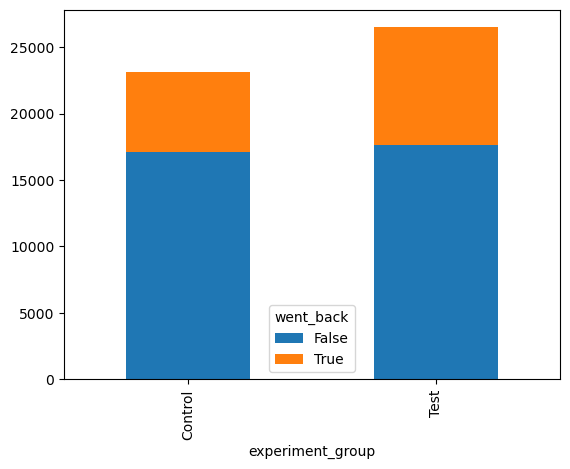

In [54]:
# Plotting a stacked bar chart for the 'crosstab_error' data
crosstab_error.plot(kind="bar", stacked=True)

## Experiment group vs repeated step

**Test group shows a higher repetition rate** compared to the Control group. This statistical significance is strong (almost zero P-Value), but the magnitude of the effect is small (0,067).

It may indicate that the new website is confusing or has some flaw in the process ideation that leads to repetition of steps, but still **the impact is low**.

In [55]:
#Create a crosstab only for 'Control' and 'Test'
crosstab_repeat = pd.crosstab(df_filtered['experiment_group'], df_filtered['repeated_step'])
((crosstab_repeat/crosstab_repeat.sum())*100).round(2)

repeated_step,False,True
experiment_group,,
Control,49.93,43.14
Test,50.07,56.86


In [56]:
chi_results(crosstab_repeat)

Chi2: 229.8594088447419, p-value: 6.3973956566191755e-52


In [57]:
cramer_result(crosstab_repeat)

0.06811102850578754

<Axes: xlabel='experiment_group'>

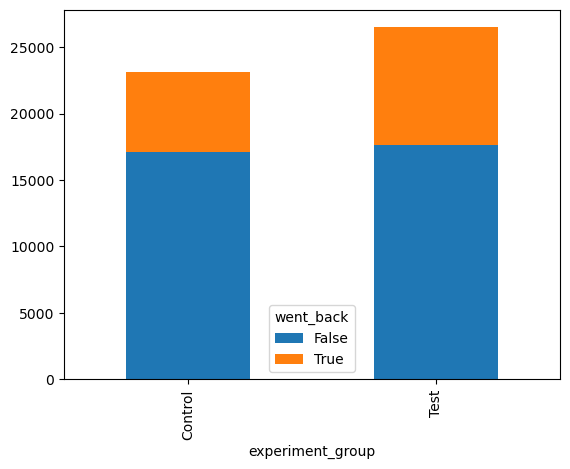

In [58]:
# Plotting a stacked bar chart for the 'crosstab_repeat' data
crosstab_error.plot(kind="bar", stacked=True)

## Experiment group vs calls last 6 months

While the Test group shows a higher proportion of users across all categories of calls made in the last 6 months, the **differences are quite small**. This suggests that the number of calls made is **not a strong factor** distinguishing the behavior of users in the Test and Control groups. 

In [59]:
crosstab_calls = pd.crosstab(df_filtered['experiment_group'], df_filtered['calls_last_6_months'])
((crosstab_calls/crosstab_calls.sum())*100).round(2)

calls_last_6_months,0.0,1.0,2.0,3.0,4.0,5.0,6.0
experiment_group,,,,,,,
Control,45.19,45.32,47.81,45.85,46.62,47.97,47.4
Test,54.81,54.68,52.19,54.15,53.38,52.03,52.6


In [60]:
chi_results(crosstab_calls)

Chi2: 23.336869554624524, p-value: 0.0006911570749403648


In [61]:
cramer_result(crosstab_calls)

0.02168951383210878

## Experiment group vs steps per visit

- Bar Plot: shows that the average **steps per visit are quite similar** between the two groups, with no substantial difference.
- Box Plot: Adds more accurary by showing that while the median and interquartile range are similar, there are some outliers in both groups. **Test group have slightly more users taking higher steps** than the Control group.

Overall, these plots reinforce the idea that the **Test group does not significantly impact the steps per visit**.

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\3376110042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='experiment_group', y='steps_per_visit', palette="coolwarm")


<Axes: xlabel='experiment_group', ylabel='steps_per_visit'>

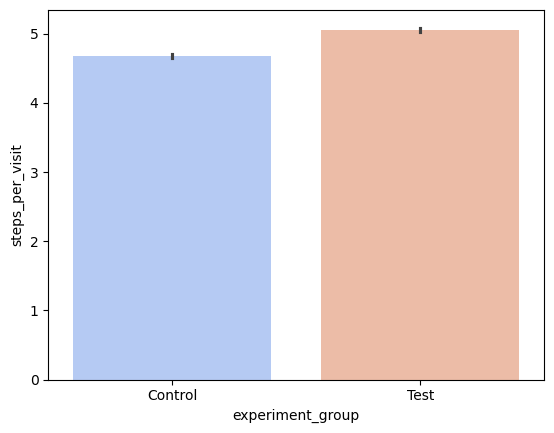

In [62]:
# Plotting a bar plot to visualize the average steps per visit for each experiment group
sns.barplot(data=df_filtered, x='experiment_group', y='steps_per_visit', palette="coolwarm")

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\4108575171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='experiment_group', y='steps_per_visit', palette="coolwarm")


<Axes: xlabel='experiment_group', ylabel='steps_per_visit'>

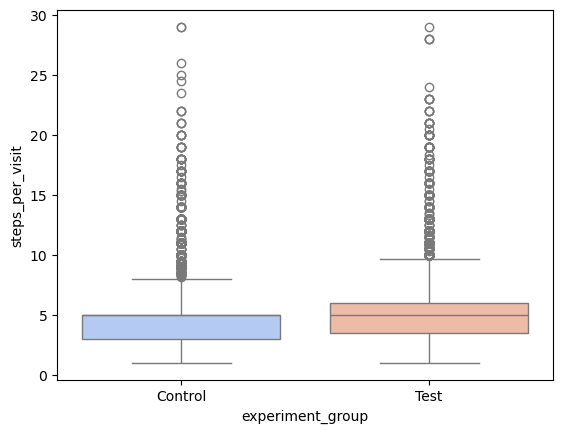

In [63]:
# Plotting a box plot to visualize the spread and outliers of steps per visit for each experiment group
sns.boxplot(data=df_filtered, x='experiment_group', y='steps_per_visit', palette="coolwarm")

## Experiment group vs total time seconds

**The Test group spends slightly more time on average** compared to the Control group, suggesting that the new design might require a bit more time for users to navigate. However, both groups show a **similar range of time spent**.

This not appears to be a major issue.


C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\2715531630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='experiment_group', y='total_time_seconds', palette="coolwarm")


<Axes: xlabel='experiment_group', ylabel='total_time_seconds'>

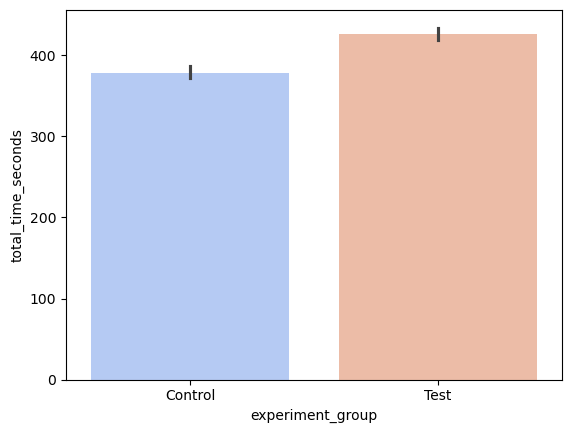

In [64]:
# Plotting a bar plot to visualize the average steps per visit for each experiment group
sns.barplot(data=df_filtered, x='experiment_group', y='total_time_seconds', palette="coolwarm")

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\50542330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='experiment_group', y='total_time_seconds', palette="coolwarm")


<Axes: xlabel='experiment_group', ylabel='total_time_seconds'>

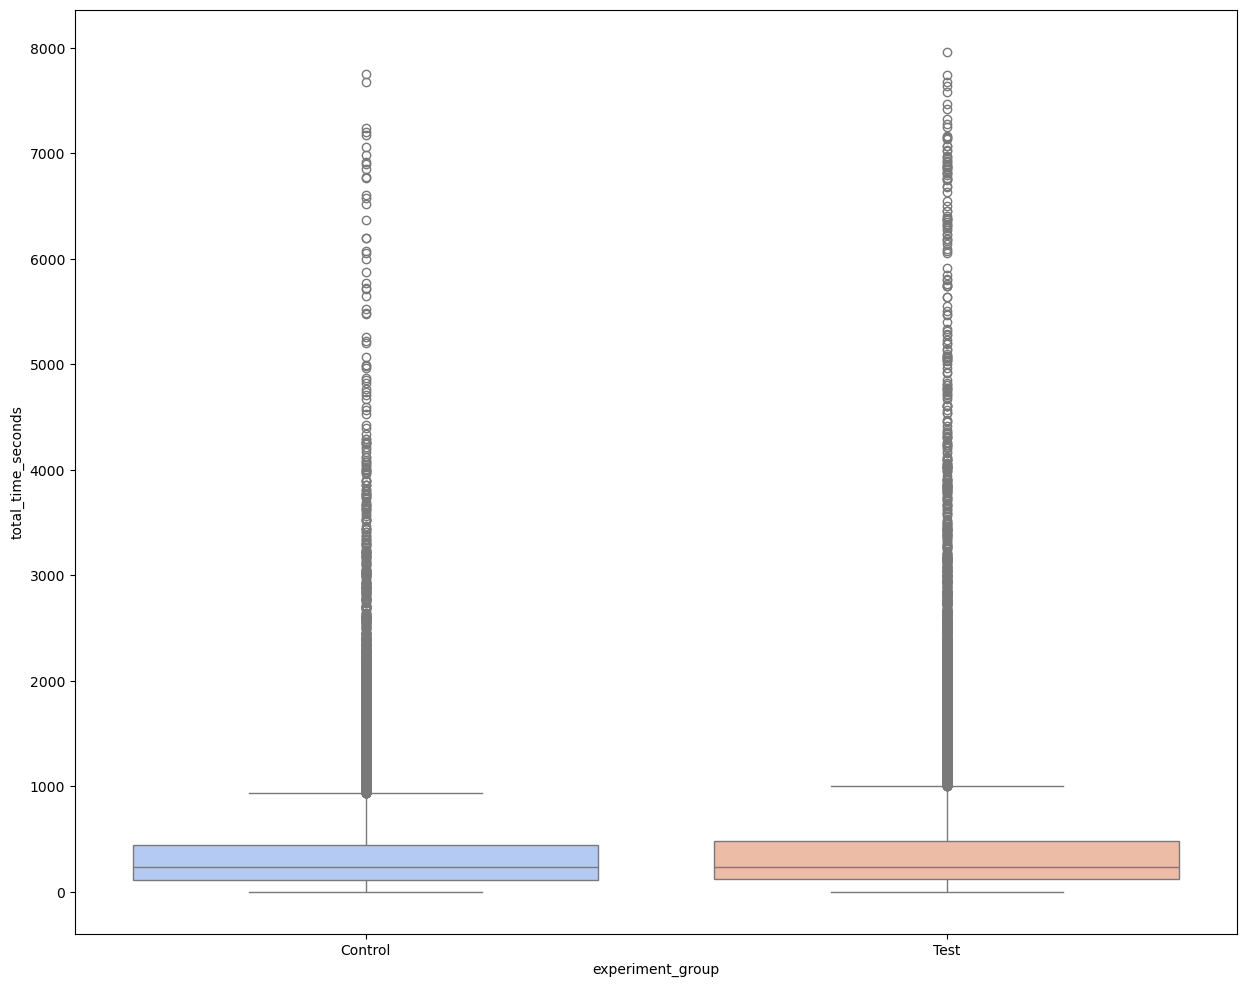

In [65]:
# Plotting a box plot to visualize the spread and outliers of total time for each experiment group
plt.figure(figsize=(15, 12))
sns.boxplot(data=df_filtered, x='experiment_group', y='total_time_seconds', palette="coolwarm")

## Continuous vs continuous

In [66]:
df_complete.columns

Index(['client_id', 'client_tenure_years', 'client_tenure_months',
       'client_age', 'gender', 'num_accounts', 'balance',
       'calls_last_6_months', 'logons_last_6_months', 'experiment_group',
       'num_visits', 'num_steps', 'steps_per_visit', 'repeated_step',
       'went_back', 'total_time_spent', 'total_time_seconds',
       'completion_status'],
      dtype='object')

In [67]:
df_numerical = df_filtered[['client_tenure_years', 'client_tenure_months', 'client_age', 'num_accounts', 'balance', 'calls_last_6_months', 'logons_last_6_months', 'num_visits', 'num_steps', 'steps_per_visit', 'total_time_seconds']]

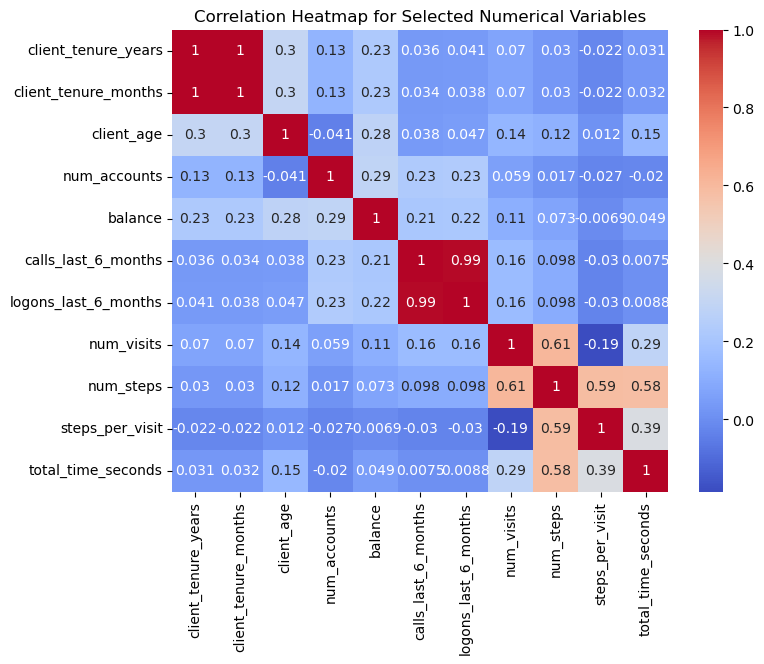

In [68]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(8, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

## Experiment groups: completion rate related to demo

In [69]:
df_test = df_filtered[df_filtered['experiment_group'] == 'Test']

In [70]:
df_control = df_filtered[df_filtered['experiment_group'] == 'Control']

In [71]:
df_completed = df_filtered[df_filtered['completion_status'] == True]

### Completion rate vs age

In the violin graph we can see how the age distribution of users who complete the process is wider in young people for the **Test group**. Wich means that a few **more younger clients completed the process**.

Also in the box plot we see that in the Test group 50% of the clients who have completed the process start at a younger age.

<Axes: title={'center': 'Box Plot of client_age vs. completion_status en TEST GROUP'}, xlabel='completion_status', ylabel='client_age'>

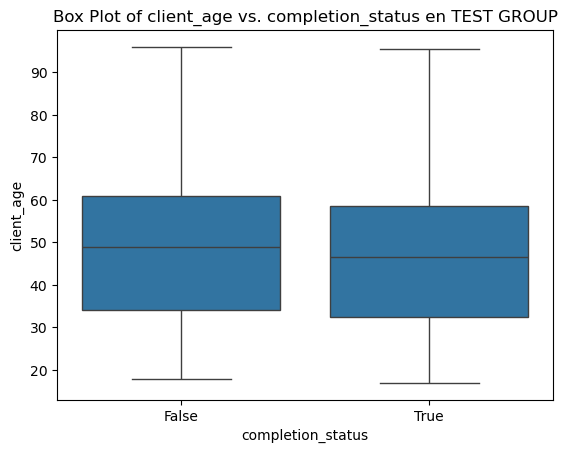

In [72]:
plt.title('Box Plot of client_age vs. completion_status en TEST GROUP')
sns.boxplot(x='completion_status', y='client_age', data=df_test)

<Axes: title={'center': 'Box Plot of client_age vs. completion_status en CONTROL GROUP'}, xlabel='completion_status', ylabel='client_age'>

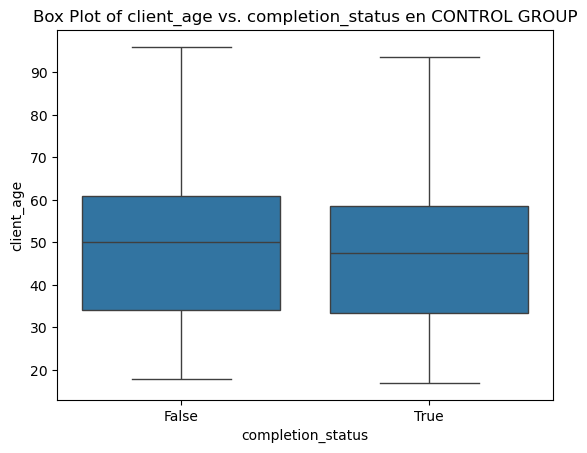

In [73]:
plt.title('Box Plot of client_age vs. completion_status en CONTROL GROUP')
sns.boxplot(x='completion_status', y='client_age', data=df_control)

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\2698671958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_test, x='completion_status', y='client_age', palette="coolwarm")


<Axes: title={'center': 'Violin Plot of client_age vs. completion_status en TEST GROUP'}, xlabel='completion_status', ylabel='client_age'>

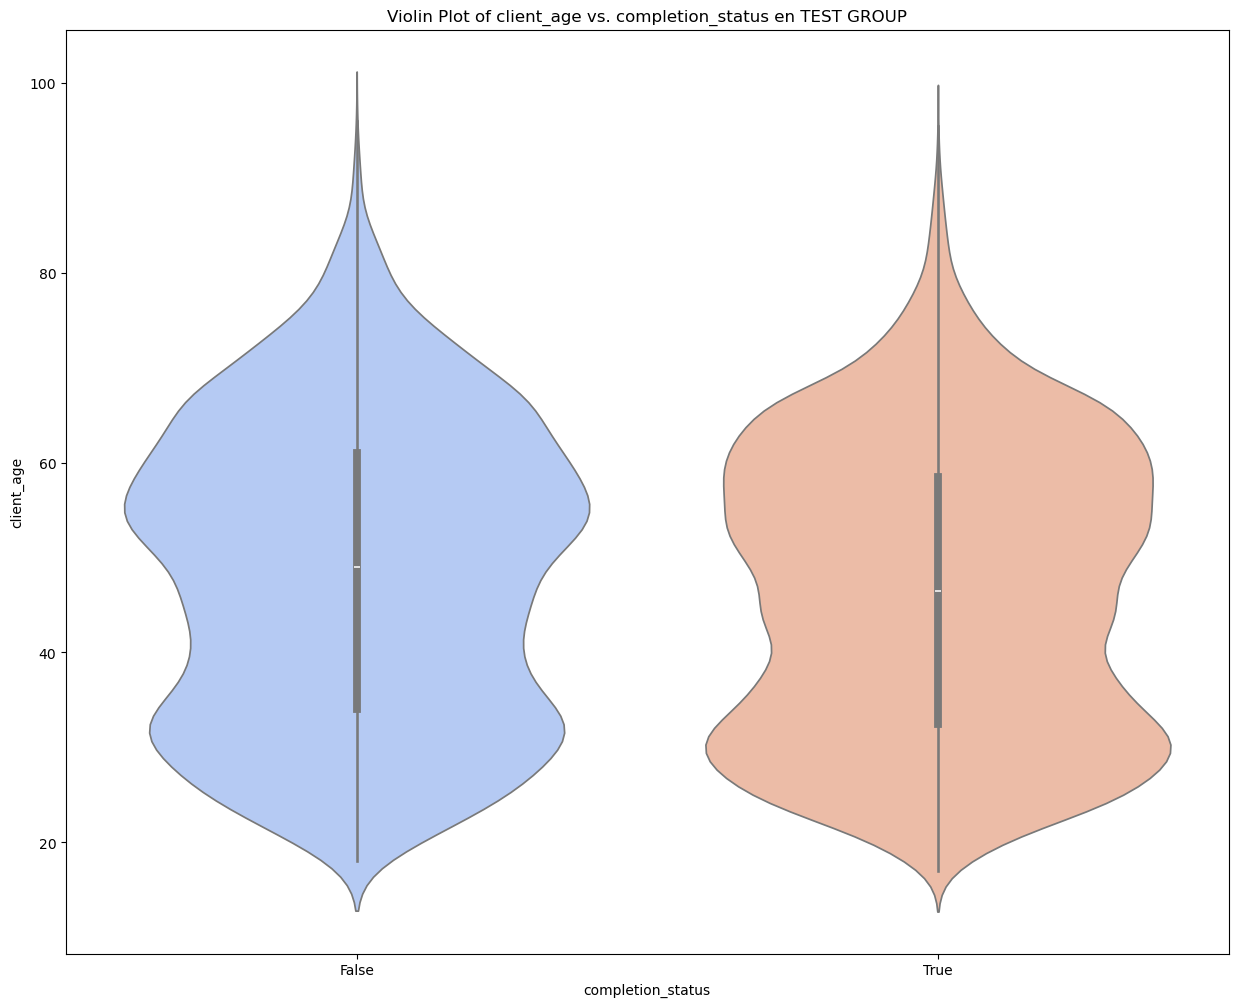

In [74]:
plt.figure(figsize=(15, 12)) 
plt.title('Violin Plot of client_age vs. completion_status en TEST GROUP')
sns.violinplot(data=df_test, x='completion_status', y='client_age', palette="coolwarm")

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\1249969552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_control, x='completion_status', y='client_age', palette="coolwarm")


<Axes: title={'center': 'Violin Plot of client_age vs. completion_status en CONTROL GROUP'}, xlabel='completion_status', ylabel='client_age'>

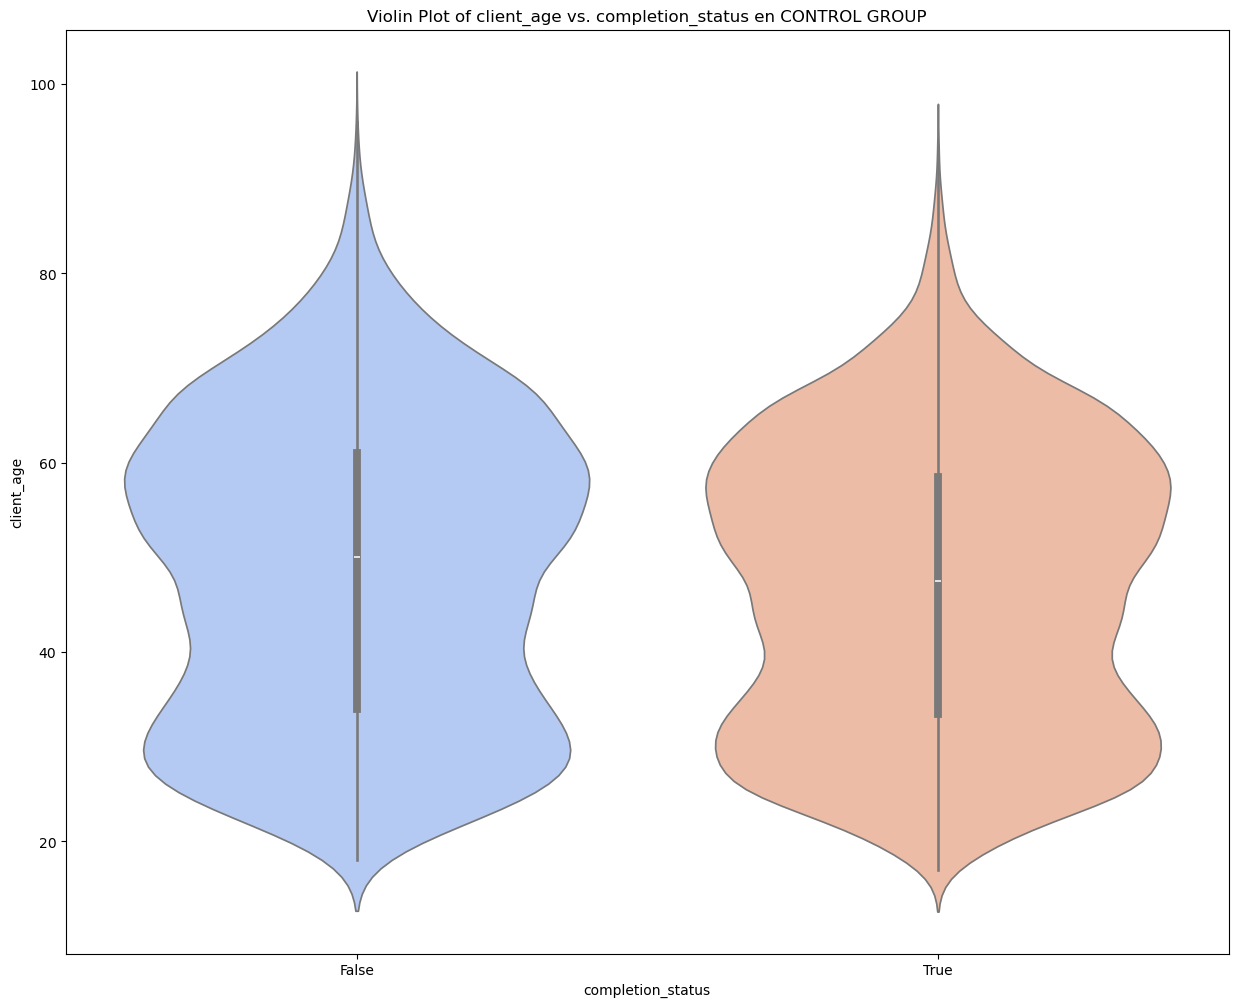

In [75]:
plt.figure(figsize=(15, 12)) 
plt.title('Violin Plot of client_age vs. completion_status en CONTROL GROUP')
sns.violinplot(data=df_control, x='completion_status', y='client_age', palette="coolwarm")

### Completion rate vs balance

The violin plot shows that the **Test Group has a slightly thicker distribution in the high balances** compared to the Control Group. This could indicate that the new web design is succeeding in retaining or motivating high value customers.

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\3629537026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='experiment_group', y='balance', data=df_completed, palette="coolwarm")


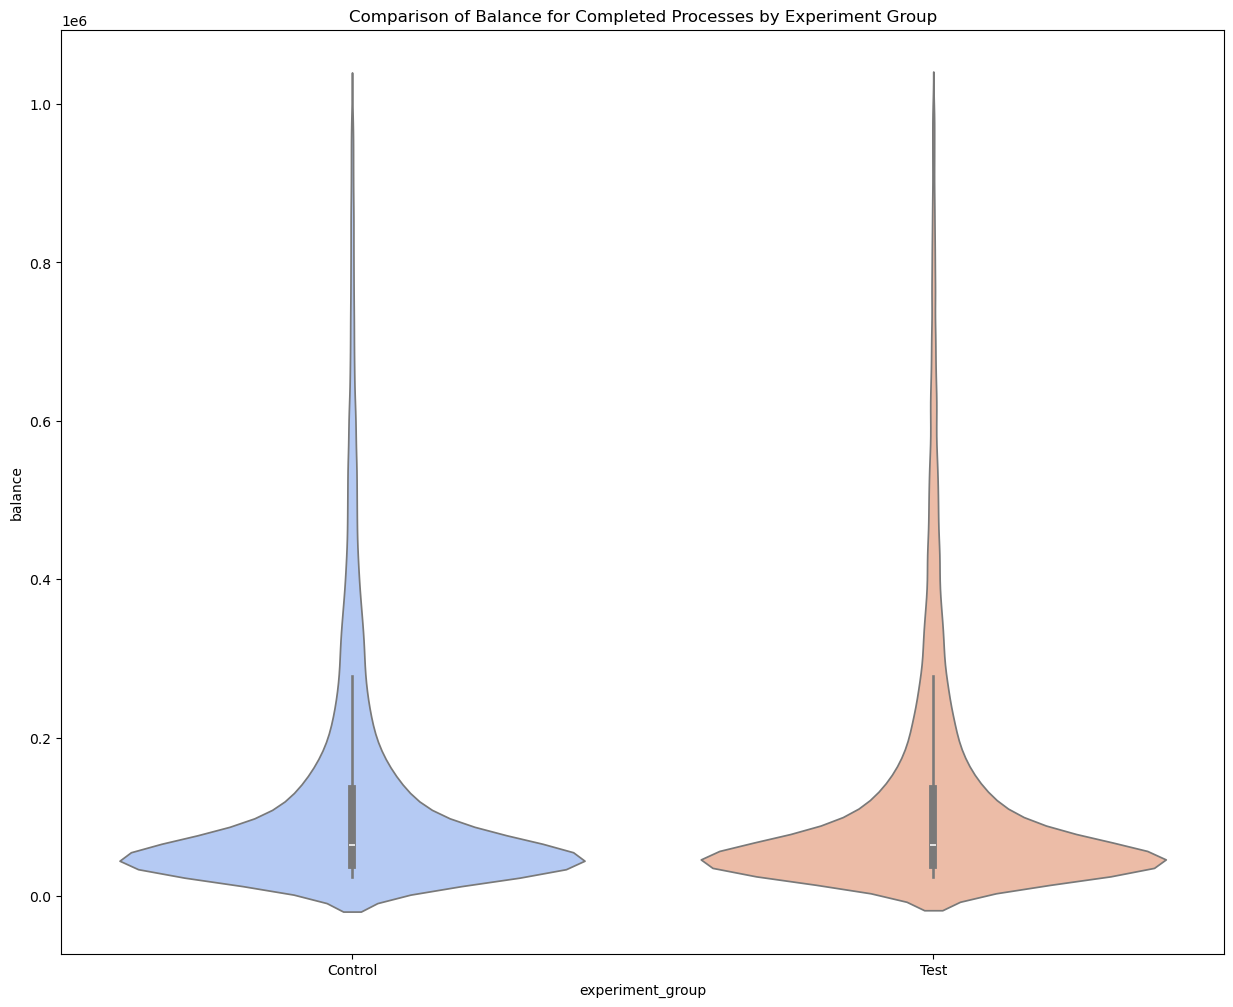

In [76]:
plt.figure(figsize=(15, 12))
sns.violinplot(x='experiment_group', y='balance', data=df_completed, palette="coolwarm")
plt.title("Comparison of Balance for Completed Processes by Experiment Group")
plt.show()

## Experiment groups: age related to KPIs

### Age vs error rate

<Axes: title={'center': 'Box Plot of client_age vs. went_back en TEST GROUP'}, xlabel='went_back', ylabel='client_age'>

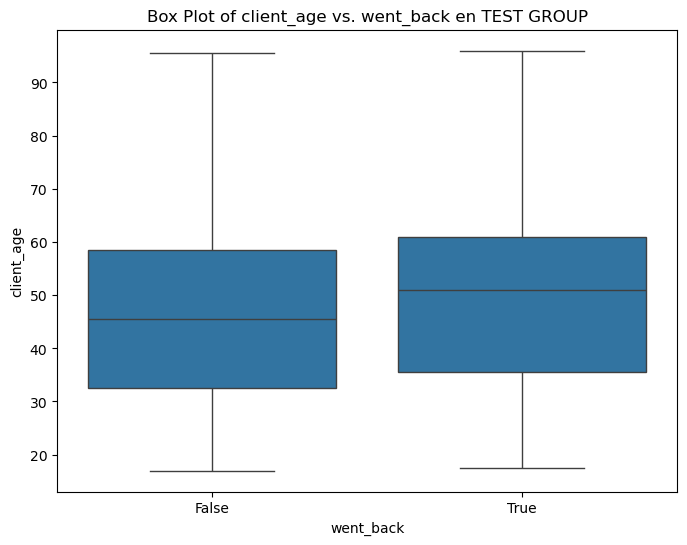

In [113]:
plt.figure(figsize=(8, 6))
plt.title('Box Plot of client_age vs. went_back en TEST GROUP')
sns.boxplot(x='went_back', y='client_age', data=df_test)

<Axes: title={'center': 'Box Plot of client_age vs. went_back en CONTROL GROUP'}, xlabel='went_back', ylabel='client_age'>

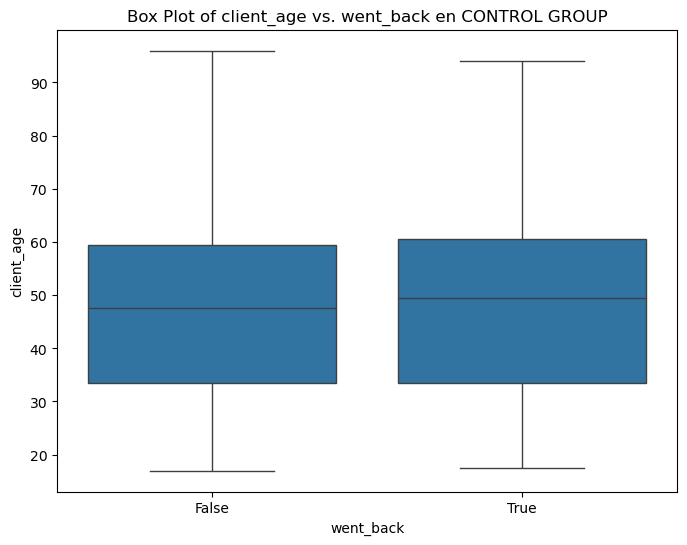

In [98]:
plt.figure(figsize=(8, 6))
plt.title('Box Plot of client_age vs. went_back en CONTROL GROUP')
sns.boxplot(x='went_back', y='client_age', data=df_control)

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\1665079636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_test, x='went_back', y='client_age', palette="coolwarm")


<Axes: title={'center': 'Violin Plot of client_age vs. went_back en TEST GROUP'}, xlabel='went_back', ylabel='client_age'>

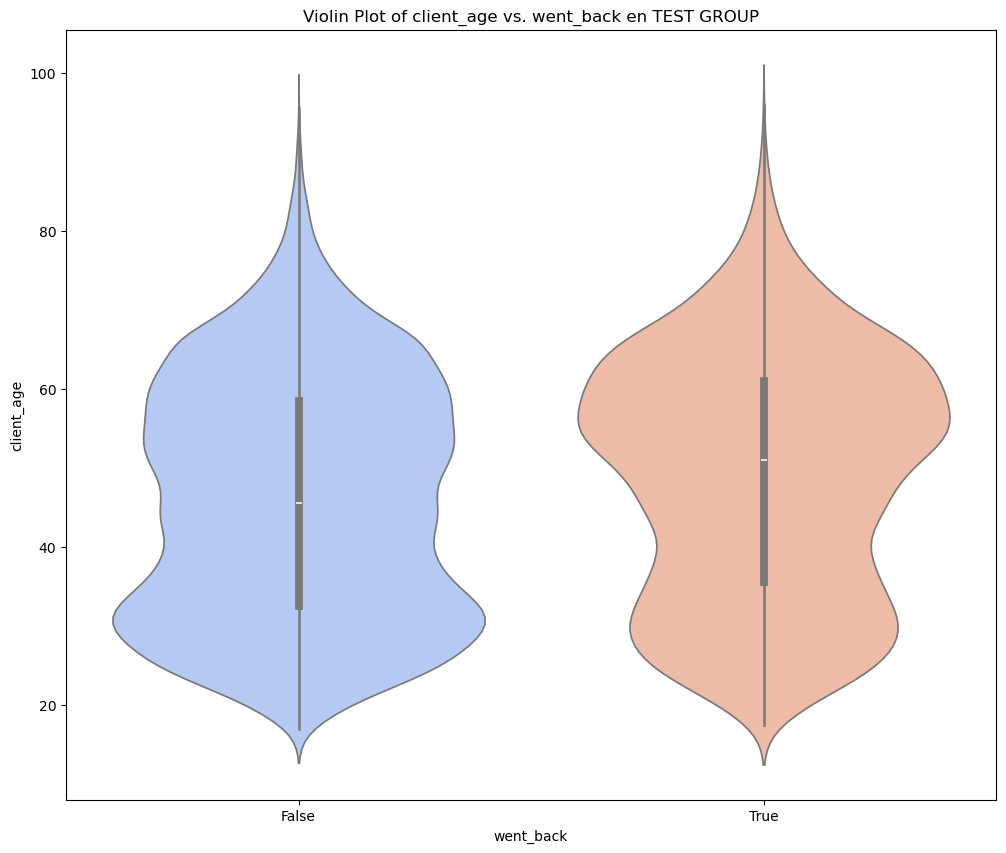

In [100]:
plt.figure(figsize=(12, 10)) 
plt.title('Violin Plot of client_age vs. went_back en TEST GROUP')
sns.violinplot(data=df_test, x='went_back', y='client_age', palette="coolwarm")

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\3899963802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_control, x='went_back', y='client_age', palette="coolwarm")


<Axes: title={'center': 'Violin Plot of client_age vs. went_back en CONTROL GROUP'}, xlabel='went_back', ylabel='client_age'>

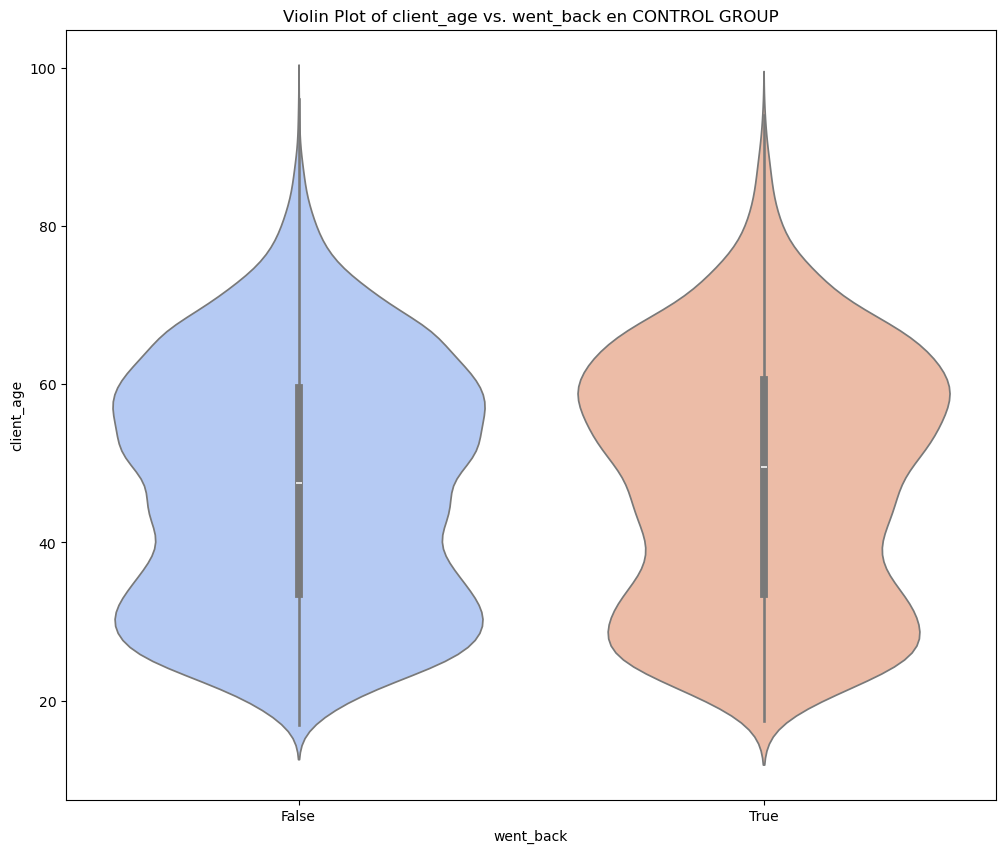

In [101]:
plt.figure(figsize=(12, 10)) 
plt.title('Violin Plot of client_age vs. went_back en CONTROL GROUP')
sns.violinplot(data=df_control, x='went_back', y='client_age', palette="coolwarm")

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\960069026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_test, x='went_back', y='client_age', palette="coolwarm")


<Axes: title={'center': 'Violin Plot of client_age vs. went_back en TEST GROUP'}, xlabel='went_back', ylabel='client_age'>

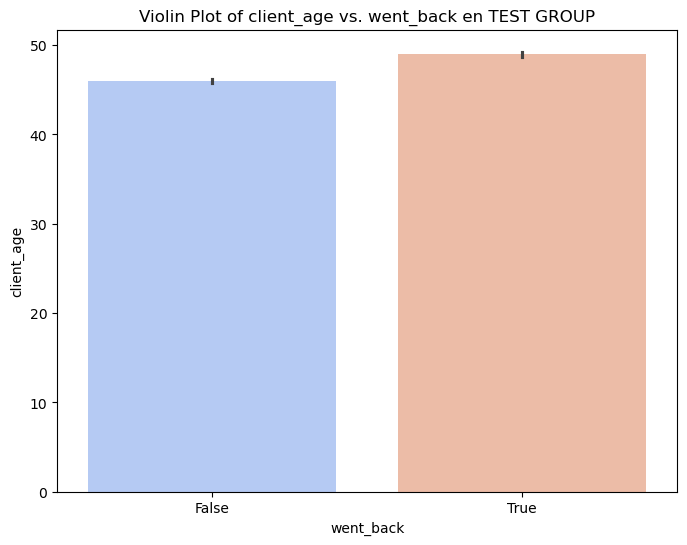

In [102]:
plt.figure(figsize=(8, 6)) 
plt.title('Violin Plot of client_age vs. went_back en TEST GROUP')
sns.barplot(data=df_test, x='went_back', y='client_age', palette="coolwarm")

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\2751991062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_control, x='went_back', y='client_age', palette="coolwarm")


<Axes: title={'center': 'Violin Plot of client_age vs. went_back en CONTROL GROUP'}, xlabel='went_back', ylabel='client_age'>

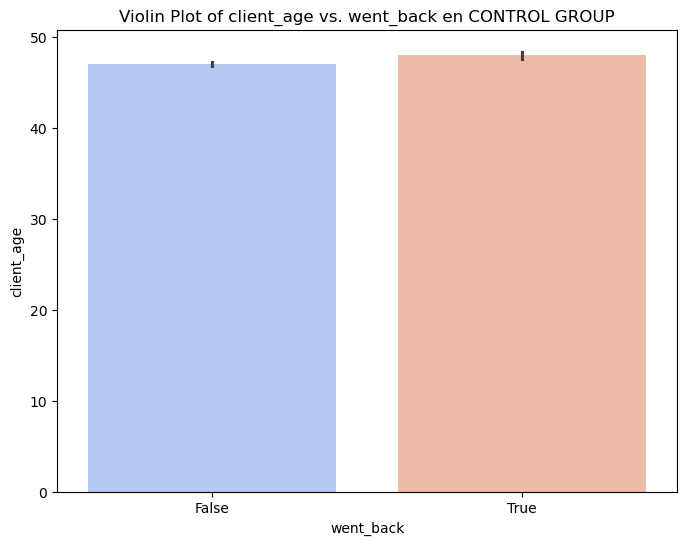

In [103]:
plt.figure(figsize=(8, 6)) 
plt.title('Violin Plot of client_age vs. went_back en CONTROL GROUP')
sns.barplot(data=df_control, x='went_back', y='client_age', palette="coolwarm")

### Age vs repeat rate

<Axes: title={'center': 'Box Plot of client_age vs. repeated_step en TEST GROUP'}, xlabel='repeated_step', ylabel='client_age'>

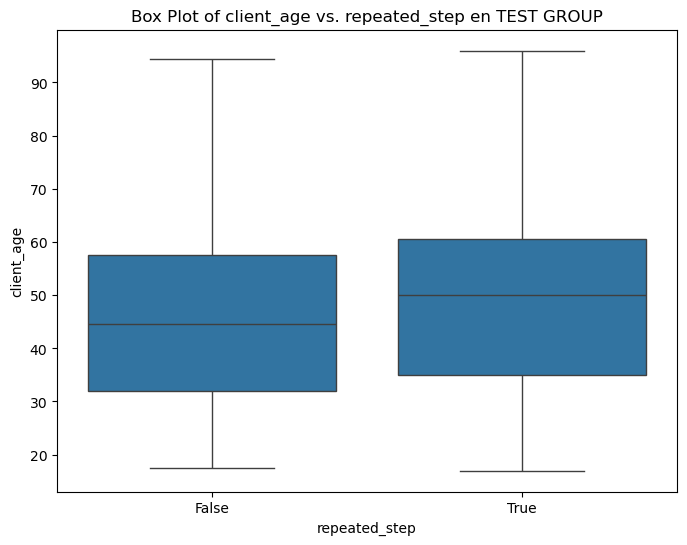

In [108]:
plt.figure(figsize=(8, 6))
plt.title('Box Plot of client_age vs. repeated_step en TEST GROUP')
sns.boxplot(x='repeated_step', y='client_age', data=df_test)

<Axes: title={'center': 'Box Plot of client_age vs. repeated_step en CONTROL GROUP'}, xlabel='repeated_step', ylabel='client_age'>

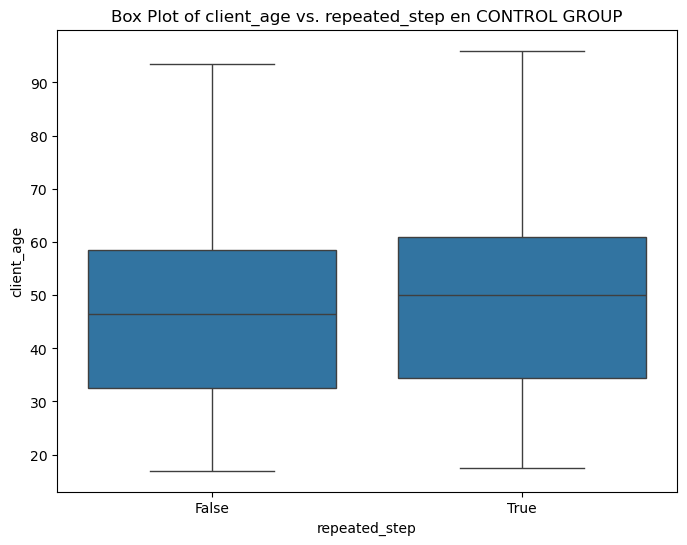

In [107]:
plt.figure(figsize=(8, 6))
plt.title('Box Plot of client_age vs. repeated_step en CONTROL GROUP')
sns.boxplot(x='repeated_step', y='client_age', data=df_control)

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\1410196190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_test, x='repeated_step', y='client_age', palette="coolwarm")


<Axes: title={'center': 'Violin Plot of client_age vs. repeated_step en TEST GROUP'}, xlabel='repeated_step', ylabel='client_age'>

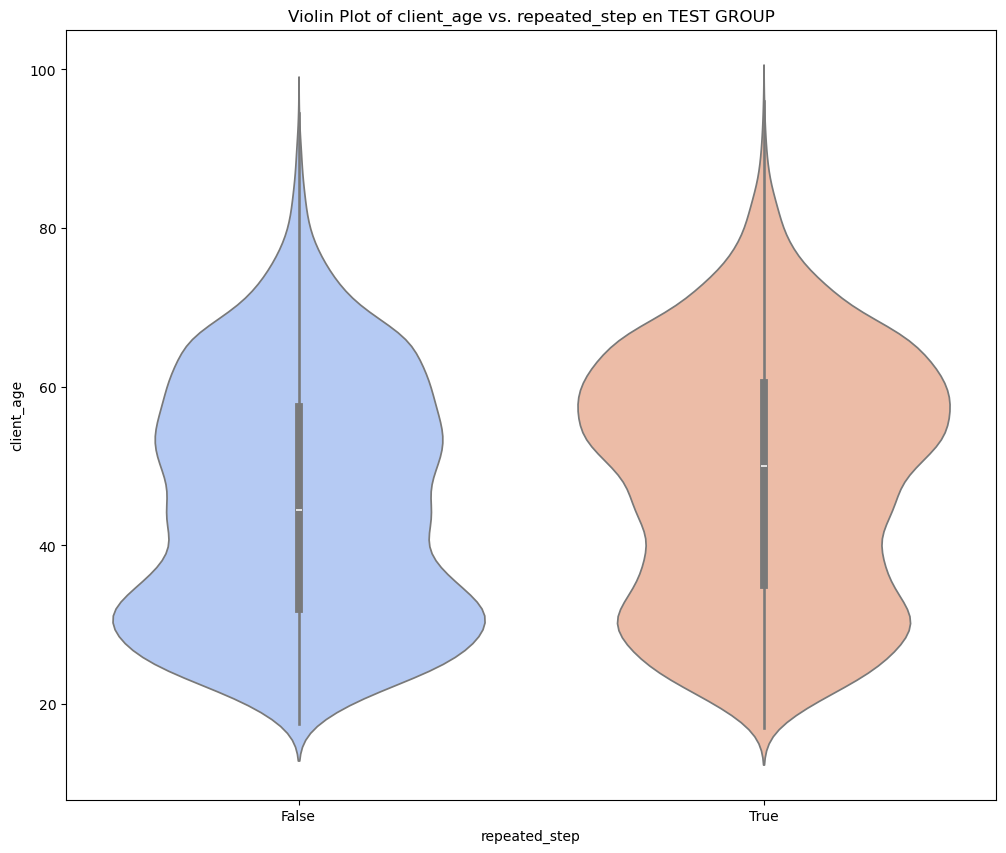

In [109]:
plt.figure(figsize=(12,10)) 
plt.title('Violin Plot of client_age vs. repeated_step en TEST GROUP')
sns.violinplot(data=df_test, x='repeated_step', y='client_age', palette="coolwarm")

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\3993219697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_control, x='repeated_step', y='client_age', palette="coolwarm")


<Axes: title={'center': 'Box Plot of client_age vs. repeated_step en CONTROL GROUP'}, xlabel='repeated_step', ylabel='client_age'>

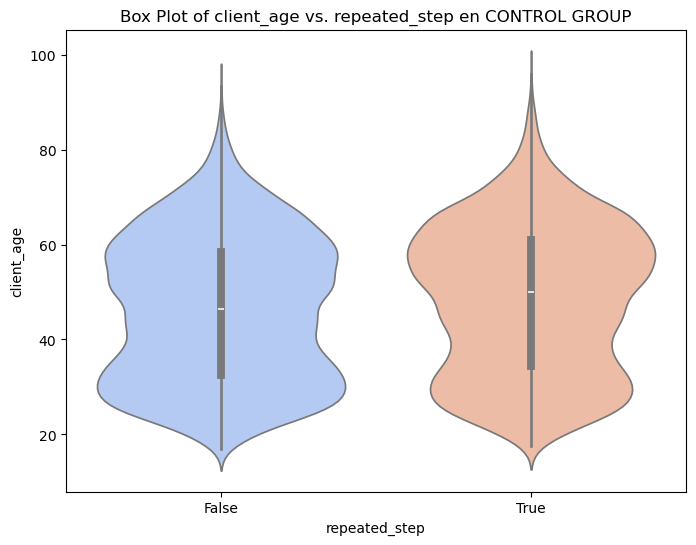

In [110]:
plt.figure(figsize=(8, 6))
plt.title('Box Plot of client_age vs. repeated_step en CONTROL GROUP')
sns.violinplot(data=df_control, x='repeated_step', y='client_age', palette="coolwarm")

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\2346873916.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_test, x='repeated_step', y='client_age', palette="coolwarm")


<Axes: title={'center': 'Bar Plot of client_age vs. repeated_step en TEST GROUP'}, xlabel='repeated_step', ylabel='client_age'>

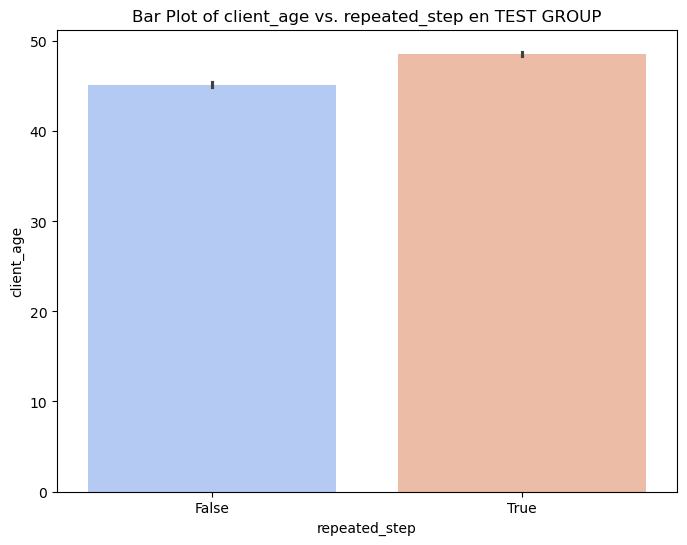

In [112]:
plt.figure(figsize=(8, 6))
plt.title('Bar Plot of client_age vs. repeated_step en TEST GROUP')
sns.barplot(data=df_test, x='repeated_step', y='client_age', palette="coolwarm")

C:\Users\almuo\AppData\Local\Temp\ipykernel_20056\1630187523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_control, x='repeated_step', y='client_age', palette="coolwarm")


<Axes: title={'center': 'Bar Plot of client_age vs. repeated_step en CONTROL GROUP'}, xlabel='repeated_step', ylabel='client_age'>

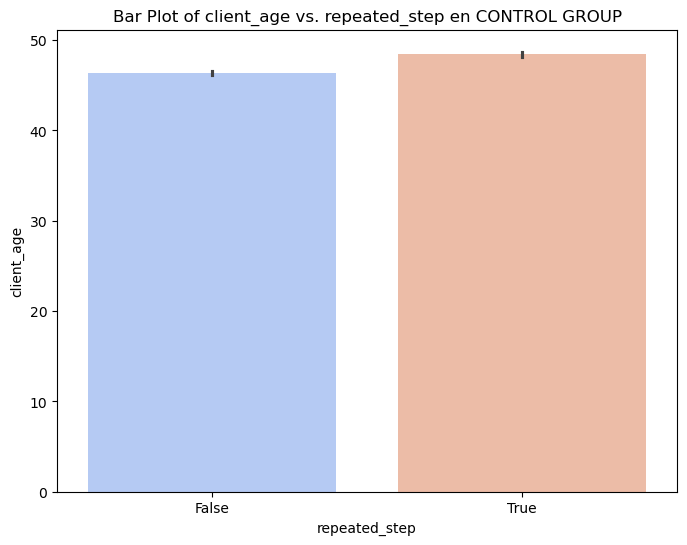

In [111]:
plt.figure(figsize=(8, 6))
plt.title('Bar Plot of client_age vs. repeated_step en CONTROL GROUP')
sns.barplot(data=df_control, x='repeated_step', y='client_age', palette="coolwarm")

### Age vs total_time_seconds

In [86]:
correlation_time = df_test['client_age'].corr(df_test['total_time_seconds'])
correlation_time

0.1518786691464607

In [87]:
correlation_time2 = df_test['client_age'].corr(df_test['total_time_seconds'], method='spearman')
correlation_time2

0.21178555932652995

### Age vs num steps

In [114]:
correlation_steps = df_test['client_age'].corr(df_test['num_steps'])
correlation_steps

0.1580818930367395

In [115]:
correlation_steps2 = df_test['client_age'].corr(df_test['num_steps'], method='spearman')
correlation_steps2

0.12807502396353257

# Hypothesis testing

## Experiment group and total time seconds

In [120]:
print("Total time spent Mean (Control):", df_filtered[df_filtered['experiment_group'] == 'Control']['total_time_seconds'].mean())
print("Total time spent Mean (Test):", df_filtered[df_filtered['experiment_group'] == 'Test']['total_time_seconds'].mean())

Total time spent Mean (Control): 378.8700506296248
Total time spent Mean (Test): 426.80794776964296


In [ ]:
#Set the hypothesis

# H0: The users spent the same or less time on the new website.
# H1: The users spent more time on the new website.

In [121]:
control_time = df_filtered[df_filtered['experiment_group'] == 'Control']['total_time_seconds']
test_time = df_filtered[df_filtered['experiment_group'] == 'Test']['total_time_seconds']

t_stat, p_value = ttest_ind(control_time, test_time)
print(f"T-Test for Balance (Control vs Test): t-statistic = {t_stat}, p-value = {p_value}")

T-Test for Balance (Control vs Test): t-statistic = -9.00502863883885, p-value = 2.2304761564600415e-19


In [123]:
alpha = 0.05

if p_value > alpha:
    print("We are not able to reject the null hypothesis. The users spent the same or less time on the new website")
else:
    print("We reject the null hypotesis. The users spent more time on the new website")

We reject the null hypotesis. The users spent more time on the new website


## Completion rate and balance

In [ ]:
#Set the hypothesis

# H0: The new website does not achieve the conversion of customers with a higher balance, its balance is the same or is lower.
# H1: The new website achieves the conversion of customers with a higher balance.

In [ ]:
print("Balance Mean (Control):", df_completed[df_completed['experiment_group'] == 'Control']['balance'].mean())
print("Balance Mean (Test):", df_completed[df_completed['experiment_group'] == 'Test']['balance'].mean())

Balance Mean (Control): 123269.68270389954
Balance Mean (Test): 122423.30269623084


In [ ]:
from scipy.stats import ttest_ind

control_balance = df_completed[df_completed['experiment_group'] == 'Control']['balance']
test_balance = df_completed[df_completed['experiment_group'] == 'Test']['balance']

t_stat, p_value = ttest_ind(control_balance, test_balance)
print(f"T-Test for Balance (Control vs Test): t-statistic = {t_stat}, p-value = {p_value}")

T-Test for Balance (Control vs Test): t-statistic = 0.5193655851942927, p-value = 0.6035092608425701


In [118]:
alpha = 0.05

if p_value > alpha:
    print("We are not able to reject the null hypothesis. The balance of the customers who completed the process is the same in both groups.")
else:
    print("We reject the null hypotesis. The new website achieves the conversion of customers with a higher balance.")

We are not able to reject the null hypothesis. The balance of the customers who completed the process is the same in both groups.


We create a dataframe with the high value customers to see if there are differences in the conversion rate (between two web versions) at this range.

In [ ]:
df_high_value = df_completed[df_completed['balance'] > 500000]

1345

In [ ]:
#Set the hypothesis

# H0: The new website does not achieve the conversion of customers with a higher balance, its balance is the same or is lower (in the high value costumers group).
# H1: The new website achieves the conversion of customers with a higher balance (in the high value costumers group).

In [ ]:
control_balance1 = df_high_value[df_high_value['experiment_group'] == 'Control']['balance']
test_balance1 = df_high_value[df_high_value['experiment_group'] == 'Test']['balance']

t_stat, p_value = ttest_ind(control_balance1, test_balance1)
print(f"T-Test for Balance (Control vs Test): t-statistic = {t_stat}, p-value = {p_value}")

T-Test for Balance (Control vs Test): t-statistic = -0.5583678565061152, p-value = 0.5766862917547173


In [119]:
alpha = 0.05

if p_value > alpha:
    print("We are not able to reject the null hypothesis. In the high value costumers group, the balance of the customers who completed the process is the same in both groups.")
else:
    print("We reject the null hypotesis. The new website achieves the conversion of customers with a higher balance, in the high value costumers group.")

We are not able to reject the null hypothesis. In the high value costumers group, the balance of the customers who completed the process is the same in both groups.
